In [1]:
import matplotlib.pyplot as plt
from extract_features import extract_mesh_features, extract_voxel_features, mask2mesh
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from skimage.draw import ellipsoid

## Surface feature extraction example

Generate binary 3D object and extract surface using marching cubes algorithm. Then extract voxel- and surface-based features and compare their values.

Citation:
Kalinin, A.A., Hou, X., Ade, A.S., Fon, G.V., Meixner, W., Higgins, G.A., Sexton, J.Z., Wan, X., Dinov, I.D., O’Meara, M.J. and Athey, B.D. 2021. Valproic acid-induced changes of 4D nuclear morphology in astrocyte cells. _Molecular Biology of the Cell_, 32(18), pp.1624-1633. [doi:10.1091/mbc.E20-08-0502](https://doi.org/10.1091/mbc.E20-08-0502)

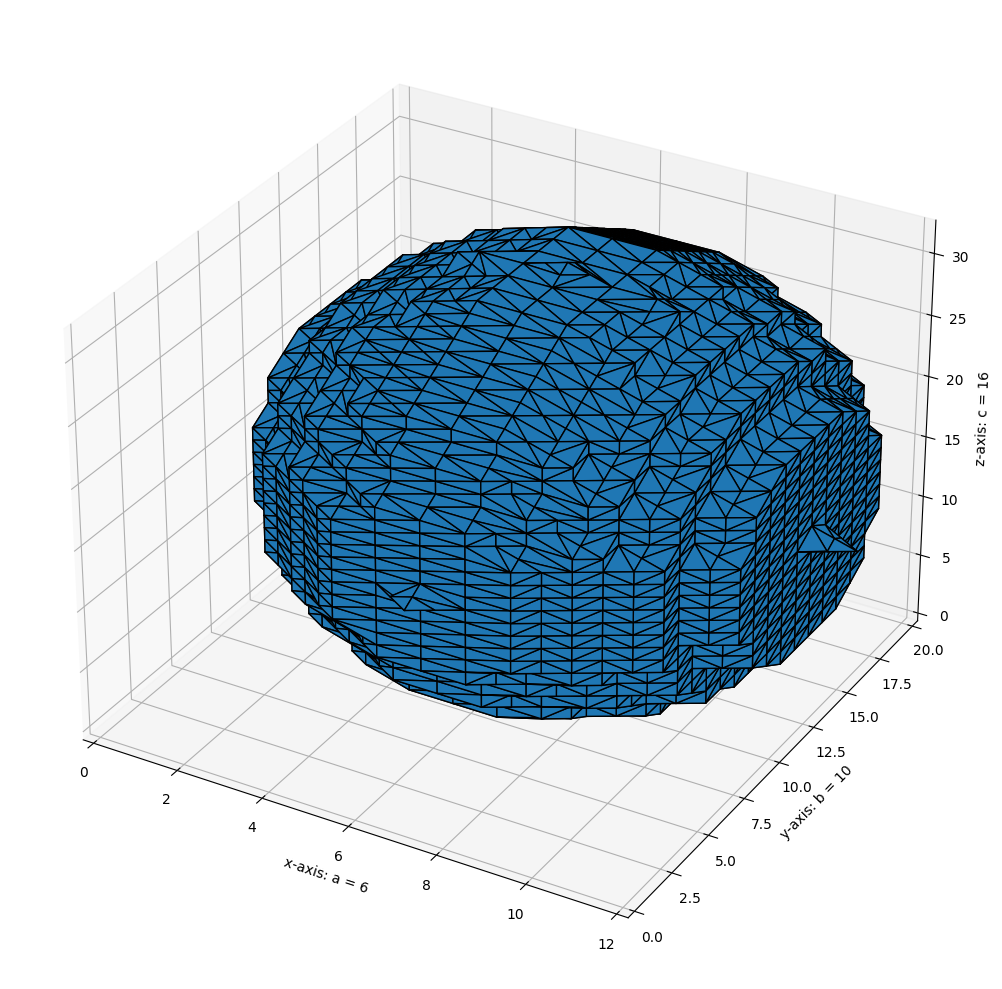

In [2]:
# modified from scikit-image marching cubes example:
# https://scikit-image.org/docs/stable/auto_examples/edges/plot_marching_cubes.html
ellip_base = ellipsoid(6, 10, 16)

# Use marching cubes to obtain the surface mesh of ellipsoid
mesh = mask2mesh(ellip_base)

# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh_poly = Poly3DCollection(mesh.vertices[mesh.faces])
mesh_poly.set_edgecolor("k")
ax.add_collection3d(mesh_poly)

ax.set_xlabel("x-axis: a = 6")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 12)  # a = 6
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

plt.tight_layout()
plt.show()

In [3]:
voxel_features = extract_voxel_features(ellip_base)
voxel_features

{'area': [3985.0],
 'bbox_area': [9009.0],
 'convex_area': [4369.0],
 'equivalent_diameter': [19.670250973754204],
 'euler_number': [1],
 'extent': [0.4423354423354423],
 'inertia_tensor_eigvals': [[71.0930991217064,
   58.00200752823086,
   27.194981179422836]],
 'major_axis_length': [31.921799051825765],
 'minor_axis_length': [11.875979785241846],
 'solidity': [0.9121080338750286]}

In [4]:
mesh_features = extract_mesh_features(mesh)
mesh_features

{'Area': 1484.5893182594875,
 'Volume': 3961.833333333333,
 'Min Axis Length': 13.0,
 'Med Axis Length': 21.0,
 'Max Axis Length': 33.0,
 'Scale': 41.2189276910499,
 'Inertia PC1': 107569.75833333342,
 'Inertia PC2': 229063.09166666673,
 'Inertia PC3': 280495.5916666668,
 'Bounding Box Volume': 9009.0,
 'Oriented Bounding Box Volume': 8753.141317365265,
 'Bounding Cylinder Volume': 9659.77646165578,
 'Bounding Sphere Volume': 18816.569198676076,
 'Convex Hull Volume': 4303.833333333333,
 'Convex Hull Area': 1443.6924234514127,
 'Sphericity': 0.8155963261165058,
 'Extent': 0.43976393976393974,
 'Solidity': 0.9205359563180111,
 'Avg Gaussian Curvature': 0.032354198286196637,
 'Avg Mean Curvature': 0.31583792475636496}